# 20 News Groups Benchmark
## Bag Of Words Models

La seconda parte del benchmark viene effettuata con un modello denominato **BoW (Bag of Word)** nel quale le parole di un documento sono rappresentate come un vettore. Il risultante vettore viene utilizzato come input di un **MLP** (incaricato della classificazione), composto da un layer hidden ed un layer di output con 20 unità corrispondenti ai 20newsgroups. 

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, log_loss
import numpy as np

In [2]:
from plots import *
from utils import *

Using TensorFlow backend.


In [3]:
twenty_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'),
                                  shuffle=True, random_state=42)
twenty_test  = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'),
                                 shuffle=True, random_state=42)
docs_test = twenty_test.data

## 1) BoW + MLP

In [4]:
bow_mlp = Pipeline(steps=[
                ('vect', CountVectorizer(stop_words="english",
                                         lowercase=True,
                                         analyzer="word",
                                         token_pattern=r'\b[a-zA-Z][a-zA-Z0-9]{2,14}\b')),
                ('tfidf', TfidfTransformer()),
                ('clf', MLPClassifier(verbose=True, 
                                      hidden_layer_sizes=(512)))
           ])

bow_mlp.fit(twenty_train.data, twenty_train.target)

savePkl('bow_mlp',bow_mlp)

Iteration 1, loss = 2.57775686
Iteration 2, loss = 1.18089896
Iteration 3, loss = 0.49115661
Iteration 4, loss = 0.26350974
Iteration 5, loss = 0.17604078
Iteration 6, loss = 0.13850371
Iteration 7, loss = 0.12069306
Iteration 8, loss = 0.11092877
Iteration 9, loss = 0.10503113
Iteration 10, loss = 0.10128091
Iteration 11, loss = 0.09860614
Iteration 12, loss = 0.09694490
Iteration 13, loss = 0.09583020
Iteration 14, loss = 0.09471909
Iteration 15, loss = 0.09403874
Iteration 16, loss = 0.09329337
Iteration 17, loss = 0.09237137
Iteration 18, loss = 0.09248841
Iteration 19, loss = 0.09163267
Iteration 20, loss = 0.09181177
Iteration 21, loss = 0.09181659
Iteration 22, loss = 0.09092777
Iteration 23, loss = 0.09103359
Iteration 24, loss = 0.09095622
Iteration 25, loss = 0.09097806
Iteration 26, loss = 0.09050290
Iteration 27, loss = 0.09060063
Iteration 28, loss = 0.09027895
Iteration 29, loss = 0.09027833
Iteration 30, loss = 0.09000105
Iteration 31, loss = 0.09013253
Iteration 32, los

In [5]:
#bow_mlp   = loadPkl('bow_mlp')

predicted = bow_mlp.predict(docs_test)
pred      = bow_mlp.predict_proba(docs_test)

test_loss = log_loss(twenty_test.target,pred)

print("Test accuracy:",np.mean(predicted == twenty_test.target))
print("Test loss:",test_loss)

training_accuracy = bow_mlp.score(twenty_train.data,twenty_train.target)
print("Training accuracy:",training_accuracy)

Test accuracy: 0.7000796601168349
Test loss: 1.1692609193481405
Training accuracy: 0.9747215838783808


In [6]:
print(classification_report(twenty_test.target, predicted,
                                    target_names=twenty_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.53      0.52      0.52       319
           comp.graphics       0.65      0.72      0.68       389
 comp.os.ms-windows.misc       0.66      0.59      0.63       394
comp.sys.ibm.pc.hardware       0.59      0.68      0.64       392
   comp.sys.mac.hardware       0.75      0.68      0.71       385
          comp.windows.x       0.82      0.70      0.75       395
            misc.forsale       0.79      0.79      0.79       390
               rec.autos       0.47      0.81      0.60       396
         rec.motorcycles       0.78      0.74      0.76       398
      rec.sport.baseball       0.87      0.81      0.84       397
        rec.sport.hockey       0.90      0.85      0.88       399
               sci.crypt       0.80      0.74      0.77       396
         sci.electronics       0.65      0.61      0.63       393
                 sci.med       0.78      0.77      0.77       396
         

In [7]:
cm = confusion_matrix(twenty_test.target,predicted).tolist()

Generating confusion matrices...


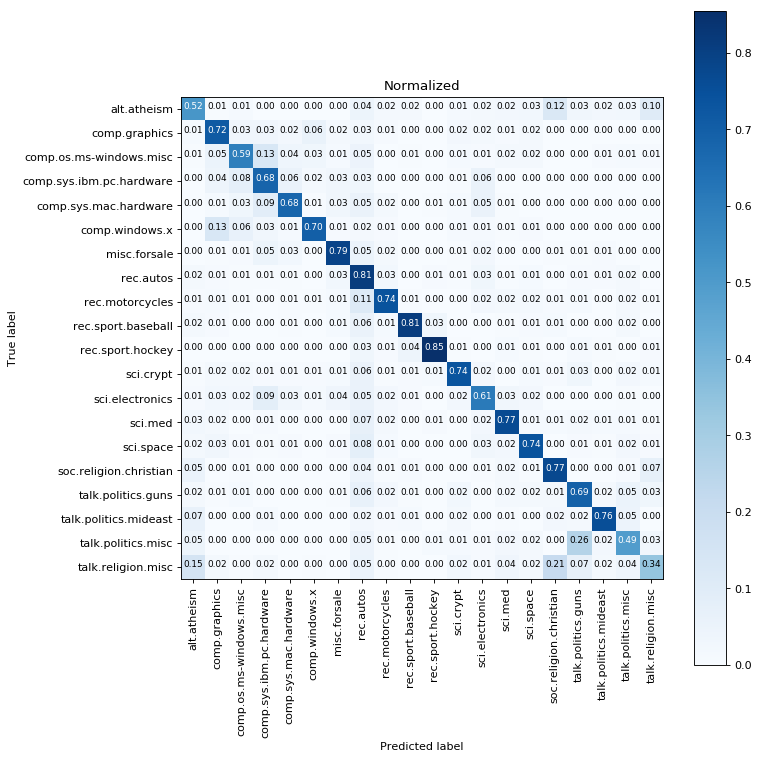

In [8]:
cm = np.array([np.array(xi) for xi in cm])

plot_confusion_matrix(cm, 'BoW+MLP', normalize=True, title='Normalized')

## End